In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pre processing stays the same
df = pd.read_csv('/content/drive/MyDrive/sanguo_data/liu_bei_fic_meta.csv')
df = df.drop_duplicates(subset=['work_id'])

def filter_fandom(x):
  if '代号鸢' not in x:
      return True
  else:
      return False
filtered = df[df['fandom'].apply(filter_fandom)]

filtered = filtered[filtered['language'] == 'Zhong Wen -Pu Tong Hua  Guo Yu']

def filter_relationship(s):
  try:
    if '刘' in s or '备' in s or '玄' in s:
      return True
    elif '鱼水' in s or '水鱼' in s:
      return True
    elif 'Liu Bei' in s:
      return True
    elif 'Liú Bèi' in s:
      return True
    else:
      return False
  except:
    return False

filtered = filtered[filtered['relationship'].apply(filter_relationship)]
filtered = filtered.reset_index()
map_df = pd.read_excel('/content/drive/MyDrive/sanguo_data/LiuBei_Mapping.xlsx', sheet_name = 'Sheet1')

mapping = {}
for i in range(map_df.shape[0]):
  k = map_df['raw'][i].strip()
  v = map_df['parent'][i].strip()
  mapping[k] = v

In [3]:
# additional pre-processing
filtered.shape

(418, 24)

In [4]:
# columns with tags in them worth looking at: relationship, character, additional tags, warnings
def split_tags(x):
  x = str(x)
  if x == '':
    return []
  else:
    return x.split(', ')

tag_counter = Counter()
for i in range(filtered.shape[0]):
  ship_list = split_tags(filtered['relationship'][i])
  character_list = split_tags(filtered['character'][i])
  warnings_lsit = split_tags(filtered['warnings'][i])
  additional_list = split_tags(filtered['additional tags'][i])
  total_tags = set(ship_list+character_list+warnings_lsit+additional_list)
  tag_counter.update(total_tags)
tag_counter.most_common(10)

[('刘备', 303),
 ('nan', 261),
 ('Creator Chose Not To Use Archive Warnings', 214),
 ('诸葛亮', 210),
 ('Liu Bei | Liu Xuande', 133),
 ('刘备/诸葛亮', 125),
 ('玄亮', 106),
 ('No Archive Warnings Apply', 98),
 ('曹操', 69),
 ('Rape/Non-Con', 62)]

In [12]:
len(tag_counter)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


779

In [5]:
tag_counter.pop('刘备')
tag_counter.pop('nan')
tag_counter.pop('Liu Bei | Liu Xuande')

133

(array([719.,  23.,  11.,   4.,   3.,   1.,   4.,   1.,   3.,   1.,   0.,
          1.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([  1.  ,   5.26,   9.52,  13.78,  18.04,  22.3 ,  26.56,  30.82,
         35.08,  39.34,  43.6 ,  47.86,  52.12,  56.38,  60.64,  64.9 ,
         69.16,  73.42,  77.68,  81.94,  86.2 ,  90.46,  94.72,  98.98,
        103.24, 107.5 , 111.76, 116.02, 120.28, 124.54, 128.8 , 133.06,
        137.32, 141.58, 145.84, 150.1 , 154.36, 158.62, 162.88, 167.14,
        171.4 , 175.66, 179.92, 184.18, 188.44, 192.7 , 196.96, 201.22,
        205.48, 209.74, 214.  ]),
 <BarContainer object of 50 artists>)

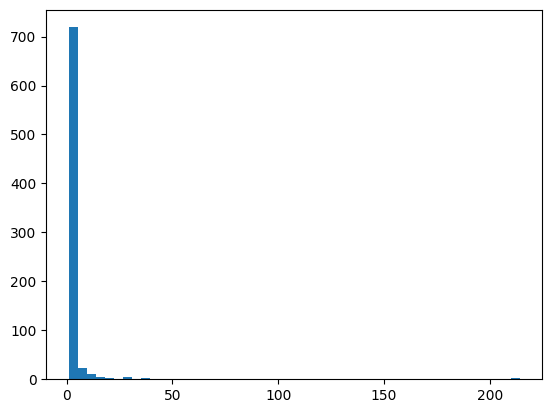

In [6]:
values = list(tag_counter.values())
plt.hist(values, bins = 50)

In [7]:
interested_tags = [key for key in tag_counter.keys() if tag_counter[key] > 10 ]
interested_tags

['Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuande',
 'Gongsun Zan | Gongsun Bogui',
 '公孙瓒',
 'Major Character Death',
 'Creator Chose Not To Use Archive Warnings',
 '法正',
 '诸葛亮',
 '玄亮',
 '曹操',
 '魏延',
 'Zhuge Liang | Zhuge Kongming',
 'Rape/Non-Con',
 'Cao Cao | Cao Mengde',
 'Cao Cao | Cao Mengde/Liu Bei | Liu Xuande',
 '孙权',
 'No Archive Warnings Apply',
 '刘封',
 '刘禅 - Character',
 '姜维',
 '赵云',
 '刘备/诸葛亮',
 'Underage',
 'Graphic Depictions Of Violence',
 '关羽',
 '张飞',
 'Liu Bei | Liu Xuande/Zhuge Liang | Zhuge Kongming',
 '亮玄',
 '生子',
 'Zhao Yun | Zhao Zilong',
 '曹操/刘备',
 '曹刘 - Relationship',
 'Guan Yu | Guan Yunchang',
 'Guan Yu | Guan Yunchang/Liu Bei | Liu Xuande',
 '玄亮 - Freeform',
 '玄亮 - Relationship']

In [13]:
len(interested_tags)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


35

In [8]:
# one hot encoding
filtered_filled = filtered.fillna('')
filtered_filled['all_tags'] = filtered_filled['relationship'] + ', ' + filtered_filled['character'] + ', ' + filtered_filled['warnings'] + ', '+ filtered_filled['additional tags']

for tag in interested_tags:
    filtered_filled[tag] = filtered_filled['all_tags'].apply(lambda x: 1 if tag in x else 0)

filtered_filled.head(5)

,index,work_id,title,author,rating,category,fandom,relationship,character,additional tags,...,Liu Bei | Liu Xuande/Zhuge Liang | Zhuge Kongming,亮玄,生子,Zhao Yun | Zhao Zilong,曹操/刘备,曹刘 - Relationship,Guan Yu | Guan Yunchang,Guan Yu | Guan Yunchang/Liu Bei | Liu Xuande,玄亮 - Freeform,玄亮 - Relationship
0,0,55809304,倾覆之巢,['JellyEvelynn'],Mature,Other,삼국지톡 | The Chat of the Three Kingdoms (Webcomi...,Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuan...,"Gongsun Zan | Gongsun Bogui, Liu Bei | Liu Xua...","单方面性转, 三角关系",...,0,0,0,0,0,0,0,0,0,0
1,2,49032004,喧宾夺主,['Mojos'],Mature,M/M,三国,法玄,"法正, 刘备",,...,0,0,0,0,0,0,0,0,0,0
2,4,55702633,铜雀台无惨文学大纲,['Allegro_1'],Mature,M/M,"三国历史 | Three Kingdoms History RPF, San Guo | T...","玄亮, 玄法, 曹亮 - Relationship","曹操, 刘备, 诸葛亮, 法正",,...,0,0,0,0,0,0,0,0,0,0
3,5,54462901,【玄亮】恣意怜,['Allegro_1'],Mature,M/M,三国演义 - 罗贯中 | Romance of the Three Kingdoms - L...,玄亮,"刘备, 诸葛亮",,...,0,0,0,0,0,0,0,0,0,0
4,6,54463801,蔬果淫趴之老刘大院,['Allegro_1'],Mature,M/M,三国演义 - 罗贯中 | Romance of the Three Kingdoms - L...,"玄亮, 玄法, 延亮","刘备, 诸葛亮, 法正, 魏延",,...,0,0,0,0,0,0,0,0,0,0


# Apriori

In [9]:
from mlxtend.frequent_patterns import apriori
sub = filtered_filled[interested_tags]
sub.head()

,Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuande,Gongsun Zan | Gongsun Bogui,公孙瓒,Major Character Death,Creator Chose Not To Use Archive Warnings,法正,诸葛亮,玄亮,曹操,魏延,...,Liu Bei | Liu Xuande/Zhuge Liang | Zhuge Kongming,亮玄,生子,Zhao Yun | Zhao Zilong,曹操/刘备,曹刘 - Relationship,Guan Yu | Guan Yunchang,Guan Yu | Guan Yunchang/Liu Bei | Liu Xuande,玄亮 - Freeform,玄亮 - Relationship
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
frequent_itemsets = apriori(sub, min_support = 0.01, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[ (frequent_itemsets['length'] >= 2) &
                   (frequent_itemsets['support'] >= 0.06)].sort_values('support', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
83,0.344498,"(诸葛亮, 玄亮)",2
94,0.301435,"(诸葛亮, 刘备/诸葛亮)",2
56,0.253589,"(诸葛亮, Creator Chose Not To Use Archive Warnings)",2
258,0.196172,"(诸葛亮, 刘备/诸葛亮, 玄亮)",3
114,0.196172,"(刘备/诸葛亮, 玄亮)",2
89,0.186603,"(诸葛亮, No Archive Warnings Apply)",2
57,0.181818,"(Creator Chose Not To Use Archive Warnings, 玄亮)",2
196,0.172249,"(诸葛亮, Creator Chose Not To Use Archive Warning...",3
278,0.150718,"(诸葛亮, No Archive Warnings Apply, 刘备/诸葛亮)",3
156,0.150718,"(No Archive Warnings Apply, 刘备/诸葛亮)",2


In [11]:
ex = frequent_itemsets[ (frequent_itemsets['length'] >= 2) &
                   (frequent_itemsets['support'] >= 0.06)].sort_values('support', ascending = False)
ex.to_csv('/content/drive/MyDrive/sanguo_data/apriori.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
